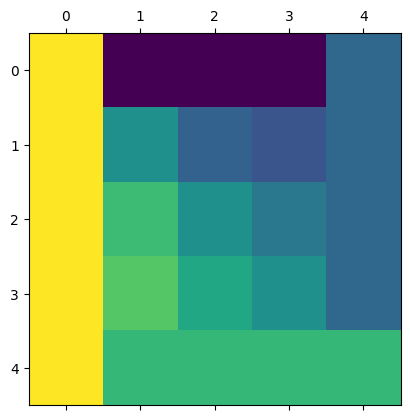

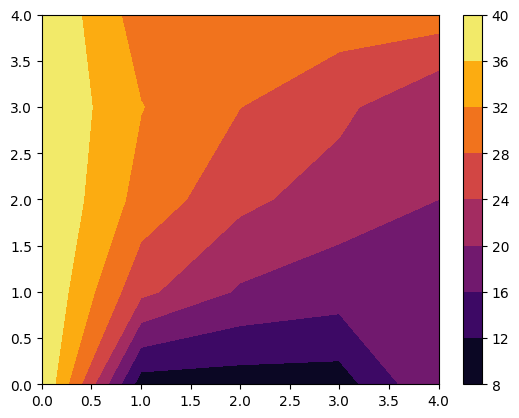

In [1]:
#2D стационар ГУ-1 dx=dy qv=0
import numpy as np
import matplotlib.pyplot as plt

T1 = 10
T2 = 20
T3 = 30
T4 = 40

lamda = 50

W = 0.1
N = 5

dx = W/N

T = np.zeros((N,N))
T[0,:]  = T1
T[:,-1] = T2
T[-1,:] = T3
T[:,0]  = T4

for i in range(9999):
    for m in range(1,N-1):
        for n in range(1,N-1):
            T[m,n] = (T[m,n-1] + T[m,n+1] + T[m-1,n] + T[m+1,n])/4

plt.matshow(T)
plt.show()

plt.contourf(T, cmap='inferno')
plt.colorbar()
plt.show()

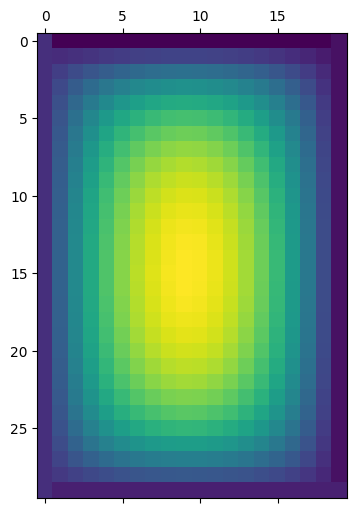

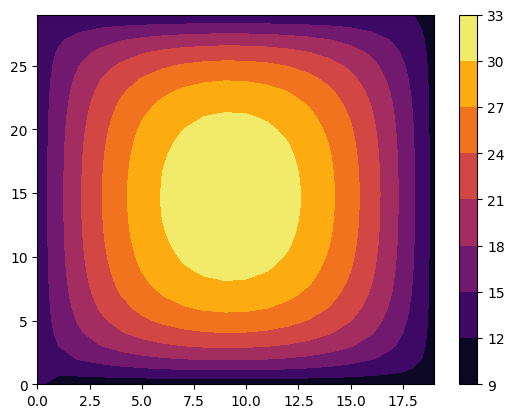

In [2]:
#2D стационар ГУ-1 прямоугольная сетка
import numpy as np
import matplotlib.pyplot as plt

T1 = 10
T2 = 11
T3 = 12
T4 = 13

lamda = 50
qv = 10**6

W = 0.1
H = 0.2

N = 20
M = 30

dx = W/N
dy = H/M

T = np.zeros((M,N))
T[0,:]  = T1
T[:,-1] = T2
T[-1,:] = T3
T[:,0]  = T4

for i in range(99999):
    
    Told = T.copy()
    
    for m in range(1,M-1):
        for n in range(1,N-1):
            T[m,n] = ( (T[m,n-1]+T[m,n+1])/dx**2 + (T[m-1,n]+T[m+1,n])/dy**2 + qv/lamda)/(2/dx**2+2/dy**2)
            
    error = np.amax(abs(T-Told)/T)
    # print(error)
    if error < 10**-5:
        break

plt.matshow(T)
plt.show()

plt.contourf(T, cmap='inferno')
plt.colorbar()
plt.show()

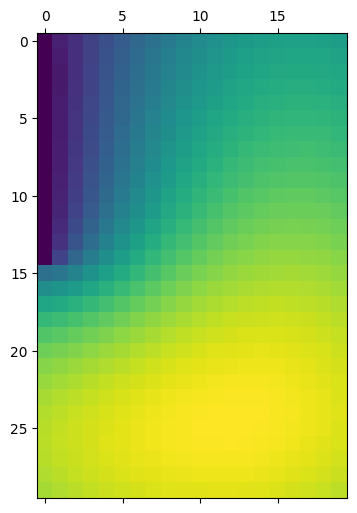

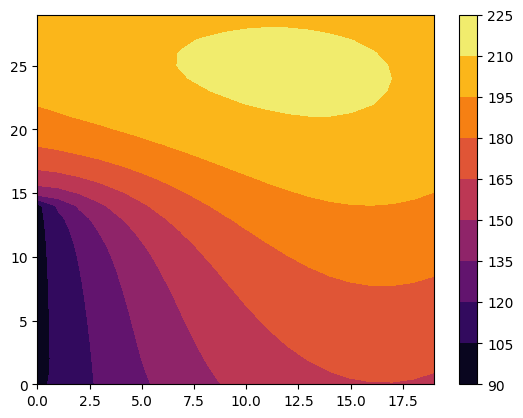

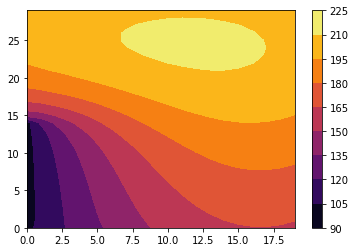

In [3]:
#2D стационар ГУ-3
import numpy as np
import matplotlib.pyplot as plt

Tf = 20
alpha = 100

lamda = 50
qv = 10**6

W = 0.1
H = 0.2

N = 20
M = 30

dx = W/N
dy = H/M

T = np.zeros((M,N))

for i in range(99999):
    
    Told = T.copy()
    
    T[0,0]   = (Tf*alpha*(dx+dy)+qv*dx*dy+(lamda*dx*T[1,0  ]/dy)+(lamda*dy*T[0,1  ]/dx))/(alpha*(dx+dy)+lamda*dx/dy+lamda*dy/dx)
    T[0,-1]  = (Tf*alpha*(dx+dy)+qv*dx*dy+(lamda*dx*T[1,-1 ]/dy)+(lamda*dy*T[0,-2 ]/dx))/(alpha*(dx+dy)+lamda*dx/dy+lamda*dy/dx)
    T[-1,-1] = (Tf*alpha*(dx+dy)+qv*dx*dy+(lamda*dx*T[-2,-1]/dy)+(lamda*dy*T[-1,-2]/dx))/(alpha*(dx+dy)+lamda*dx/dy+lamda*dy/dx)
    T[-1,0]  = (Tf*alpha*(dx+dy)+qv*dx*dy+(lamda*dx*T[-2,0 ]/dy)+(lamda*dy*T[-1,1 ]/dx))/(alpha*(dx+dy)+lamda*dx/dy+lamda*dy/dx)
    
    for n in range(1,N-1):
        T[0,n]  = (Tf*alpha*dx+qv*dx*dy+(lamda*dy*T[0,n-1 ]/dx)+(lamda*dy*T[0,n+1 ]/dx)+(lamda*dx*T[1,n ]/dy))/(alpha*dx+lamda*dx/dy+2*lamda*dy/dx)
        T[-1,n] = (Tf*alpha*dx+qv*dx*dy+(lamda*dy*T[-1,n-1]/dx)+(lamda*dy*T[-1,n+1]/dx)+(lamda*dx*T[-2,n]/dy))/(alpha*dx+lamda*dx/dy+2*lamda*dy/dx)
    for m in range(1,M-1):
        T[m,-1] = (Tf*alpha*dy+qv*dx*dy+(lamda*dx*T[m-1,-1]/dy)+(lamda*dx*T[m+1,-1]/dy)+(lamda*dy*T[m,-2]/dx))/(alpha*dy+lamda*dy/dx+2*lamda*dx/dy)
        T[m,0]  = (Tf*alpha*dy+qv*dx*dy+(lamda*dx*T[m-1,0 ]/dy)+(lamda*dx*T[m+1,0 ]/dy)+(lamda*dy*T[m,1 ]/dx))/(alpha*dy+lamda*dy/dx+2*lamda*dx/dy)
    
    
    T[:15,0] = 100 #з4
    
    for m in range(1,M-1):
        for n in range(1,N-1):
            T[m,n] = ( (T[m,n-1]+T[m,n+1])/dx**2 + (T[m-1,n]+T[m+1,n])/dy**2 + qv/lamda)/(2/dx**2+2/dy**2)
            
    error = np.amax(abs(T-Told)/T)
    # print(error)
    if error < 10**-5:
        break

plt.matshow(T)
plt.show()

plt.contourf(T, cmap='inferno')
plt.colorbar()
plt.show()

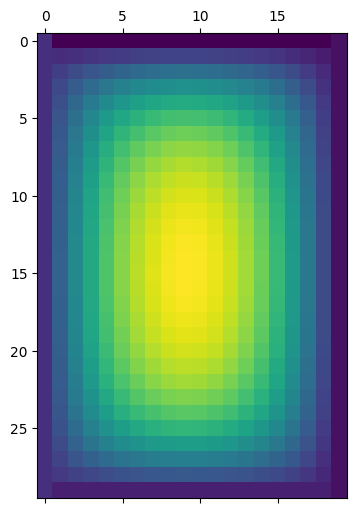

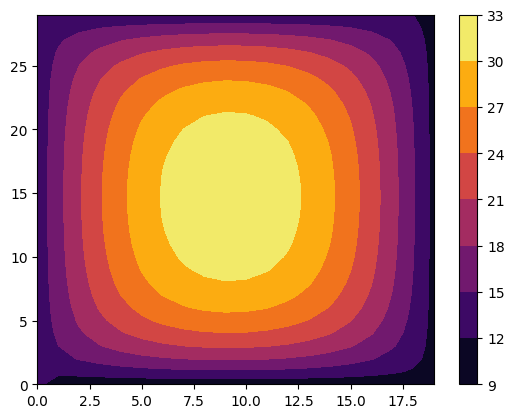

In [4]:
#2D стационар ГУ-1 linalg
import numpy as np
import matplotlib.pyplot as plt

T1 = 10
T2 = 11
T3 = 12
T4 = 13

lamda = 50
qv = 10**6

W = 0.1
H = 0.2

N = 20
M = 30

dx = W/N
dy = H/M

A = np.zeros((M*N,M*N))
B = np.zeros(M*N)

for m in range(1,M-1):
    for n in range(1,N-1):
        i = m*N+n
        A[i,i] = -(2/dx**2+2/dy**2)
        A[i,i-1] = 1/dx**2
        A[i,i+1] = 1/dx**2
        A[i,i-N] = 1/dy**2
        A[i,i+N] = 1/dy**2
        B[i] = -qv/lamda

for n in range(N):
    m=0
    i = m*N+n
    A[i,i] = 1
    B[i] = T1
    m=M-1
    i = m*N+n
    A[i,i] = 1
    B[i] = T3

for m in range(M):
    n=0
    i = m*N+n
    A[i,i] = 1
    B[i] = T4
    n=N-1
    i = m*N+n
    A[i,i] = 1
    B[i] = T2

t = np.linalg.solve(A,B)
T = np.zeros((M,N))

for m in range(M):
    for n in range(N):
        i = m*N+n
        T[m,n] = t[i]

plt.matshow(T)
plt.show()

plt.contourf(T, cmap='inferno')
plt.colorbar()
plt.show()